In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from joblib import load
from joblib import dump

In [2]:
X, y = load('../../../preprocessing/clustering_data.joblib')

In [3]:
X, _, y, _ = train_test_split(X, y, train_size=0.001, stratify=y, random_state=42)

In [4]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.13467162, 0.06706966, 0.06485308])

In [6]:
sum(explained_variance_ratio)

0.26659435448558816

In [7]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.13467162, 0.20174128, 0.26659435])

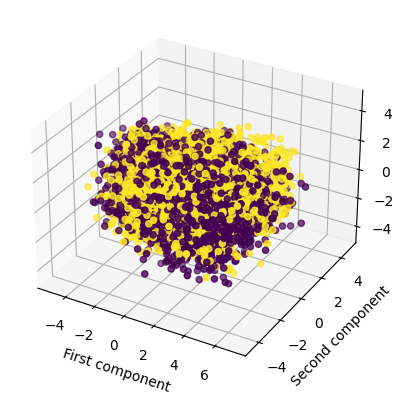

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_df['Component 1'], X_pca_df['Component 2'], X_pca_df['Component 3'], c=y)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')

plt.show()

In [4]:
_, _,_,rf_clf = load('../../classification/decision_trees/decision_trees.joblib')

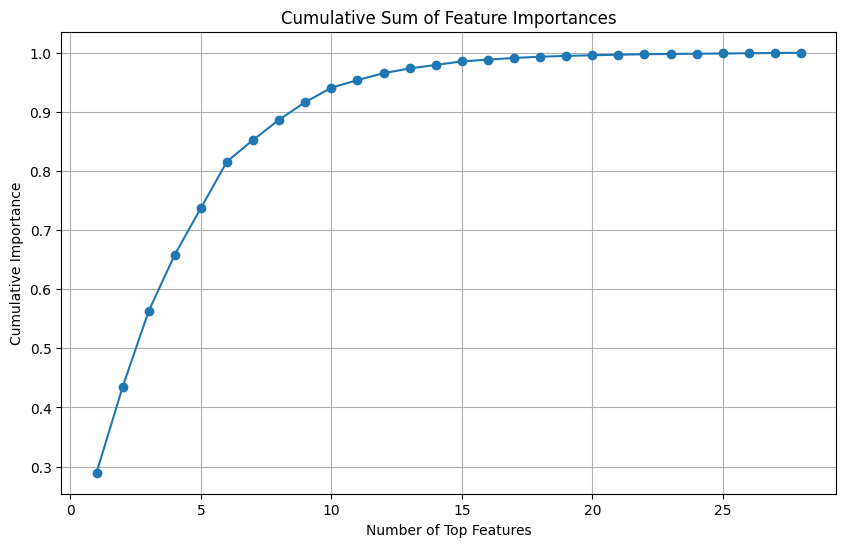

In [5]:
importances = rf_clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
cumulative_importances = np.cumsum(importances[sorted_idx])

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importances) + 1), cumulative_importances, '-o')
plt.title('Cumulative Sum of Feature Importances')
plt.xlabel('Number of Top Features')
plt.ylabel('Cumulative Importance')
plt.grid(True)
plt.show()

In [6]:
feature_names = [
    'lepton_pT',
    'lepton_eta',
    'lepton_phi',
    'missing_energy_magnitude',
    'missing_energy_phi',
    'jet_1_pt',
    'jet_1_eta',
    'jet_1_phi',
    'jet_1_b-tag',
    'jet_2_pt',
    'jet_2_eta',
    'jet_2_phi',
    'jet_2_b-tag',
    'jet_3_pt',
    'jet_3_eta',
    'jet_3_phi',
    'jet_3_b-tag',
    'jet_4_pt',
    'jet_4_eta',
    'jet_4_phi',
    'jet_4_b-tag',
    'm_jj',
    'm_jjj',
    'm_lv',
    'm_jlv',
    'm_bb',
    'm_wbb',
    'm_wwbb'
]

top_5_indices = sorted_idx[:5].tolist()
top_5_feature_names = [feature_names[i] for i in top_5_indices]
print(top_5_feature_names)

['m_bb', 'm_wwbb', 'm_wbb', 'm_jjj', 'm_jlv']


In [7]:
X, y = load('../../../preprocessing/clustering_data.joblib')
X, _, y, _ = train_test_split(X, y, train_size=0.001, stratify=y, random_state=42)

In [8]:
X_top_5 = X[top_5_feature_names]

In [9]:
X_top_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11000 entries, 7963938 to 6456332
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_bb    11000 non-null  float64
 1   m_wwbb  11000 non-null  float64
 2   m_wbb   11000 non-null  float64
 3   m_jjj   11000 non-null  float64
 4   m_jlv   11000 non-null  float64
dtypes: float64(5)
memory usage: 515.6 KB


In [10]:
pca = PCA(n_components=3)
X_top_5 = pca.fit_transform(X_top_5)
X_top_5_df = pd.DataFrame(X_top_5, columns=['Component 1', 'Component 2', 'Component 3'])

In [11]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.5698167 , 0.19029378, 0.14908575])

In [12]:
sum(explained_variance_ratio)

0.9091962345452049

In [13]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.5698167 , 0.76011049, 0.90919623])

In [14]:
score = silhouette_score(X_top_5, y)

In [15]:
score

0.015564825434754518

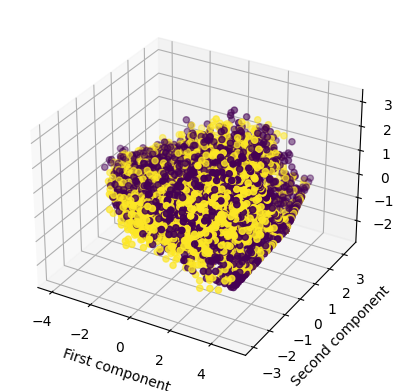

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_top_5_df['Component 1'], X_top_5_df['Component 2'], X_top_5_df['Component 3'], c=y)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
ax.set_zlabel('Third component')

plt.show()

In [17]:
#Nema veze sto je za pca plot izmesan. Bitno je da je visoka varijansa.

In [18]:
# def visualize_clustering(centers, labels, data, alg_name):
#     plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color="black")

#     for c in np.unique(labels):
#         elems = data[labels == c]
#         plt.scatter(elems.iloc[:, 0], elems.iloc[:, 1], label=c, alpha=1.0)

#     plt.xlabel('Component 1')
#     plt.ylabel('Component 2')
#     plt.title('{} {} clusters'.format(alg_name, len(centers)))
#     plt.show()

def visualize_clustering(centers, labels, data, alg_name):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for c in np.unique(labels):
        elems = data[labels == c]
        ax.scatter(elems.iloc[:, 0], elems.iloc[:, 1], elems.iloc[:, 2], label=f'Cluster {c}')

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('{} {} clusters'.format(alg_name, len(centers)))
    ax.legend()
    plt.show()

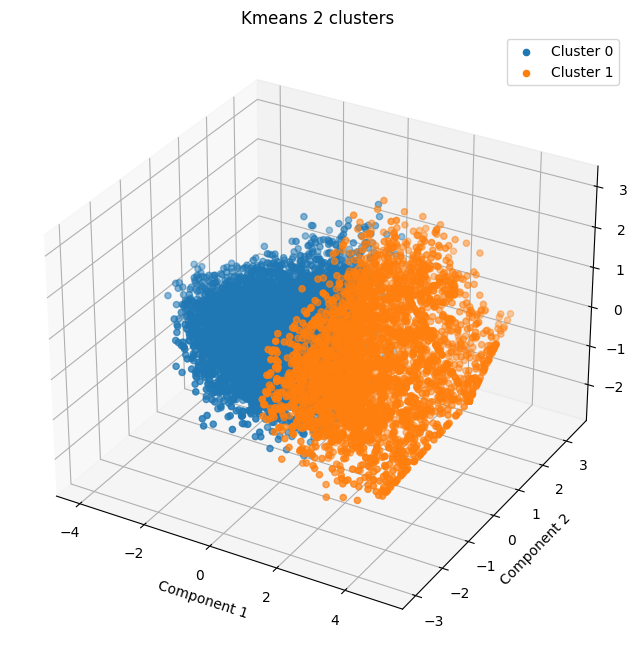

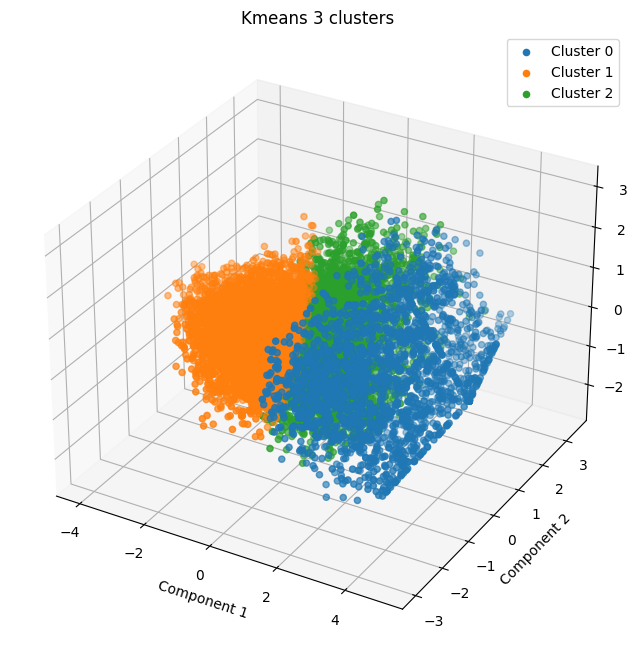

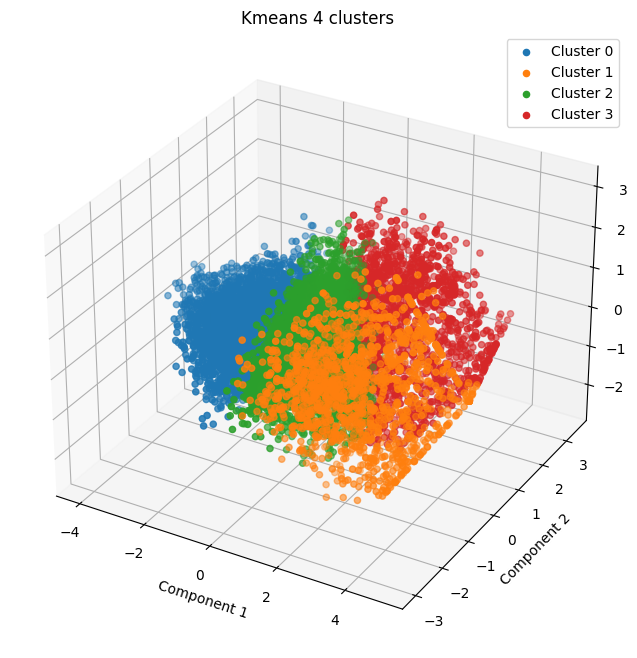

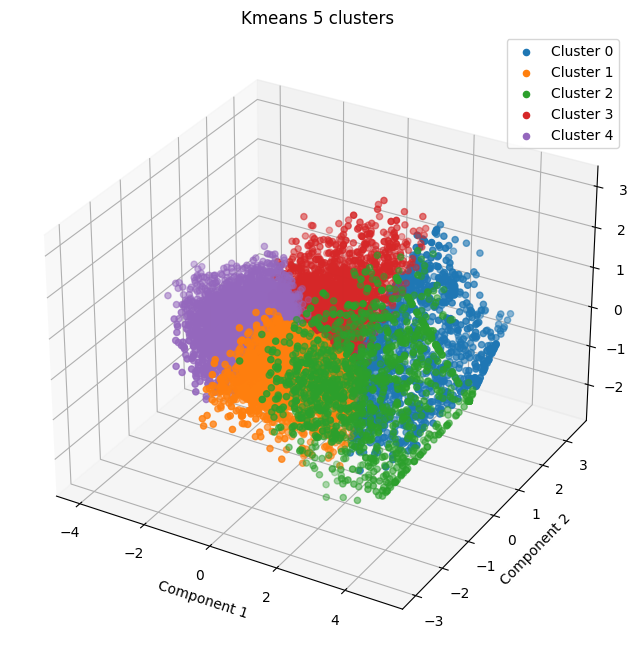

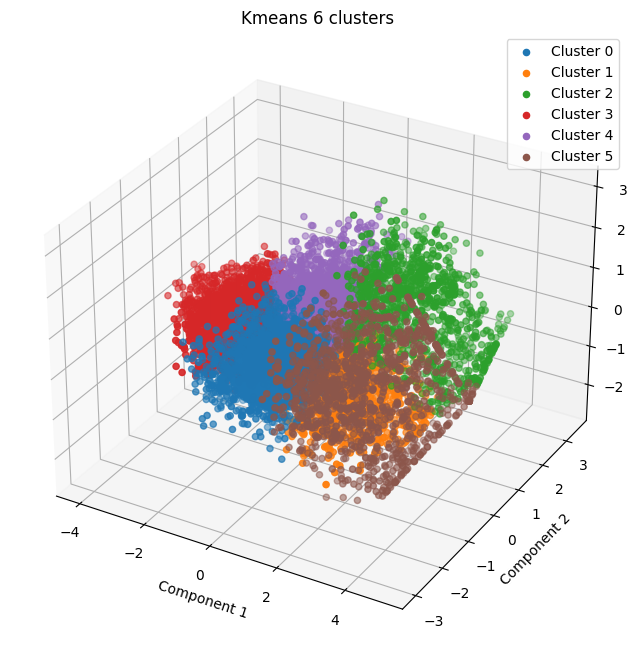

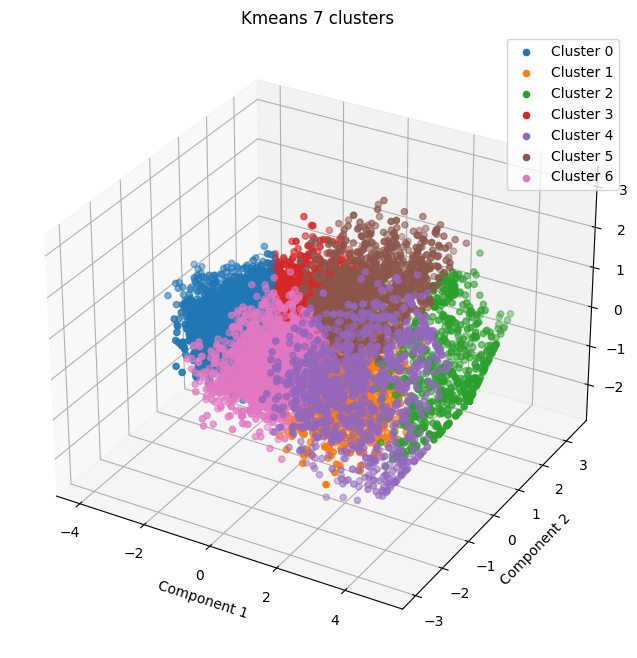

In [24]:
sse = []
silhouette_scores = []
kmeans_cluster_centers = []

for n_clusters in range(2, 8): 
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto') 
    kmeans.fit(X_top_5)
    
    visualize_clustering(kmeans.cluster_centers_, kmeans.labels_, X_top_5_df, "Kmeans")
    
    kmeans_cluster_centers.append(kmeans.cluster_centers_)
    sse.append(kmeans.inertia_)
    
    silhouette_scores.append(silhouette_score(X_top_5, kmeans.labels_))

In [25]:
sse

[28439.33013852127,
 23097.081804060854,
 19822.723050623266,
 17142.293902470017,
 14627.900247064372,
 13138.128250392268]

In [26]:
silhouette_scores

[0.41833483696916957,
 0.27812074859613356,
 0.25184425744163935,
 0.26149436221167516,
 0.2679590846807514,
 0.2630712110120302]

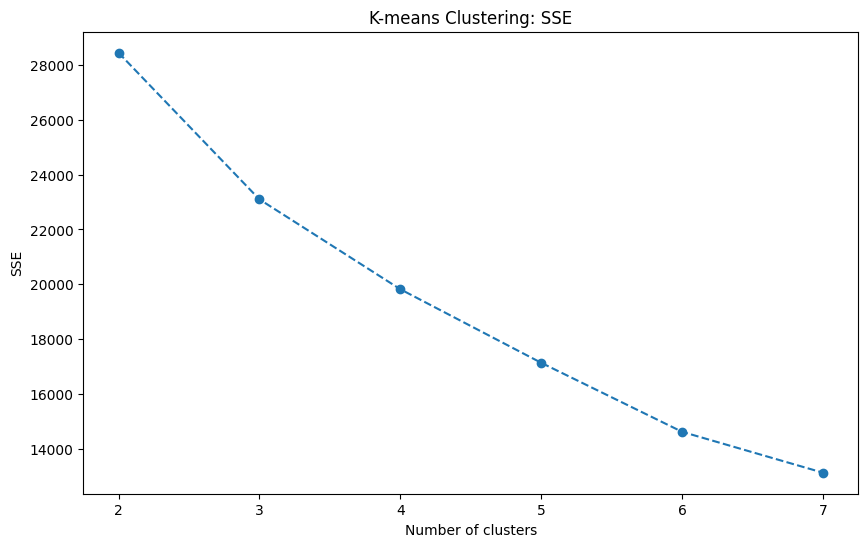

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 8), sse, marker='o', linestyle='--')
plt.title('K-means Clustering: SSE')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

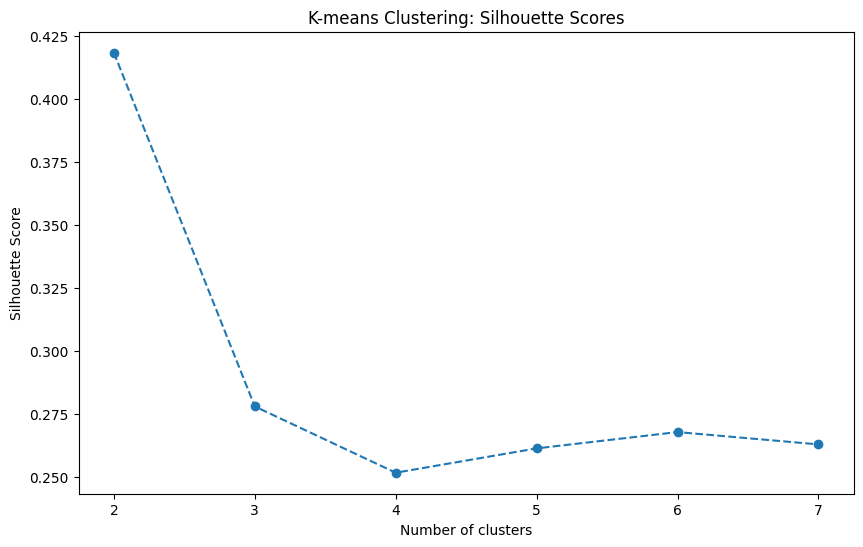

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--')
plt.title('K-means Clustering: Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

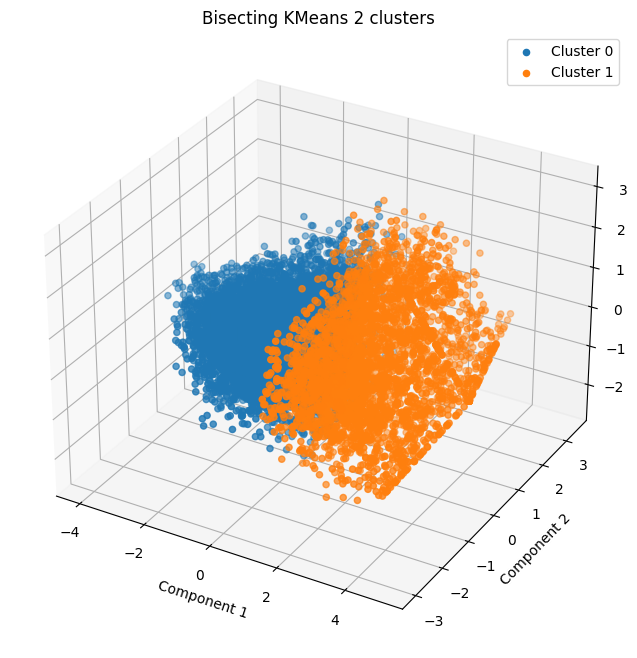

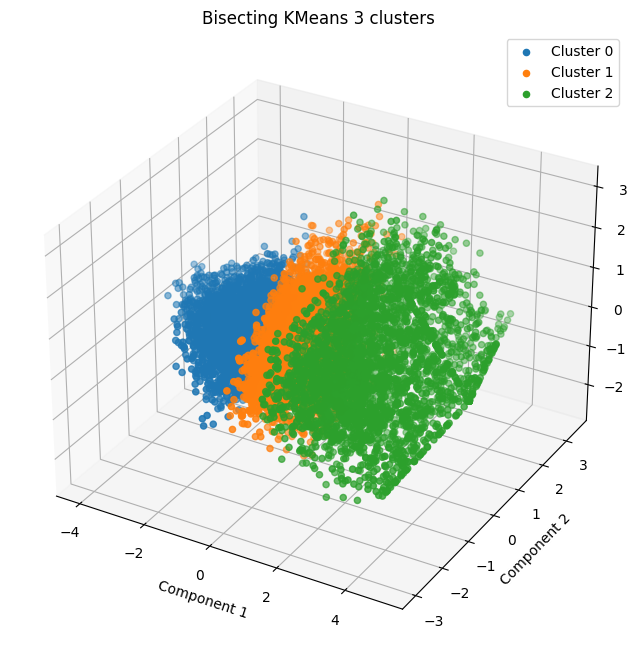

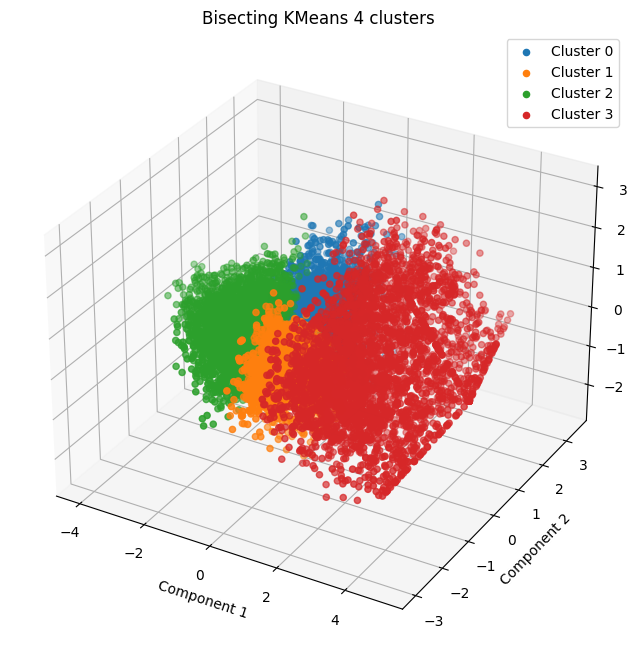

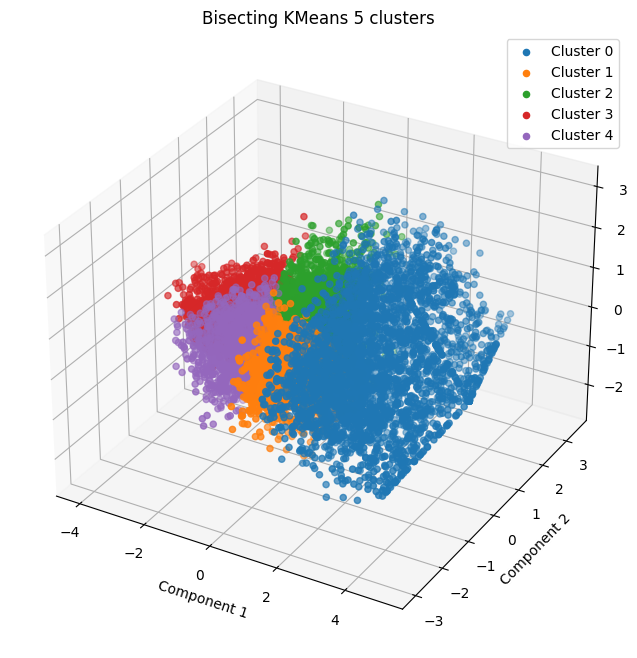

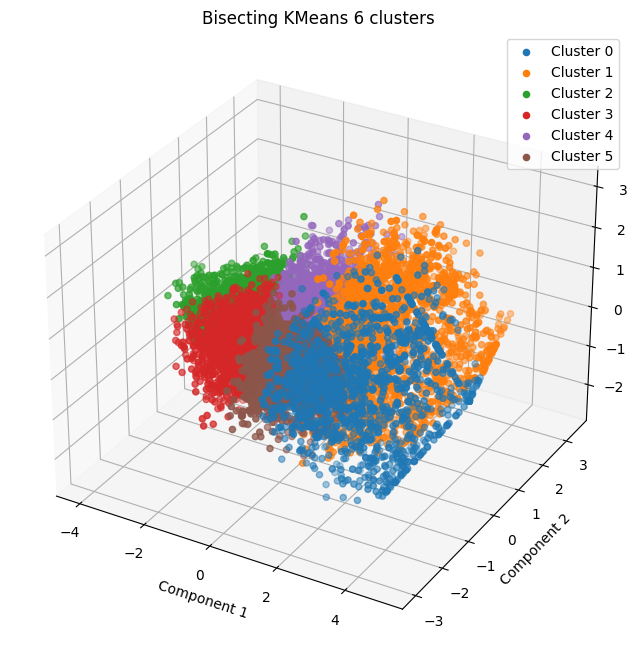

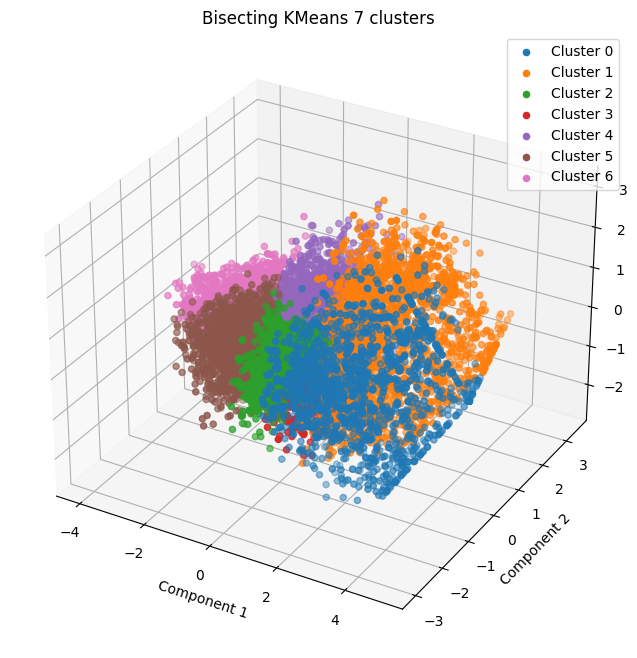

In [29]:
bisectingkmeans_sse = []
bisectingkmeans_silhouette_scores = []
bisectingkmeans_cluster_centers = []

for n_clusters in range(2, 8): 
    bisectingkmeans = BisectingKMeans(n_clusters=n_clusters,bisecting_strategy='largest_cluster')
    bisectingkmeans.fit(X_top_5)
    
    visualize_clustering(bisectingkmeans.cluster_centers_, bisectingkmeans.labels_,X_top_5_df,"Bisecting KMeans")
    
    bisectingkmeans_cluster_centers.append(bisectingkmeans.cluster_centers_)
    bisectingkmeans_sse.append(bisectingkmeans.inertia_)
    
    bisectingkmeans_silhouette_scores.append(silhouette_score(X_top_5, bisectingkmeans.labels_))    

In [30]:
bisectingkmeans_sse

[28439.386331750986,
 24365.4456019515,
 22296.923867259422,
 21108.377876971885,
 16974.96036896619,
 15850.910415795135]

In [31]:
bisectingkmeans_silhouette_scores

[0.4180180507243535,
 0.2131437004026759,
 0.18535892667591364,
 0.15958499984069838,
 0.18698290826567857,
 0.1798291685692487]

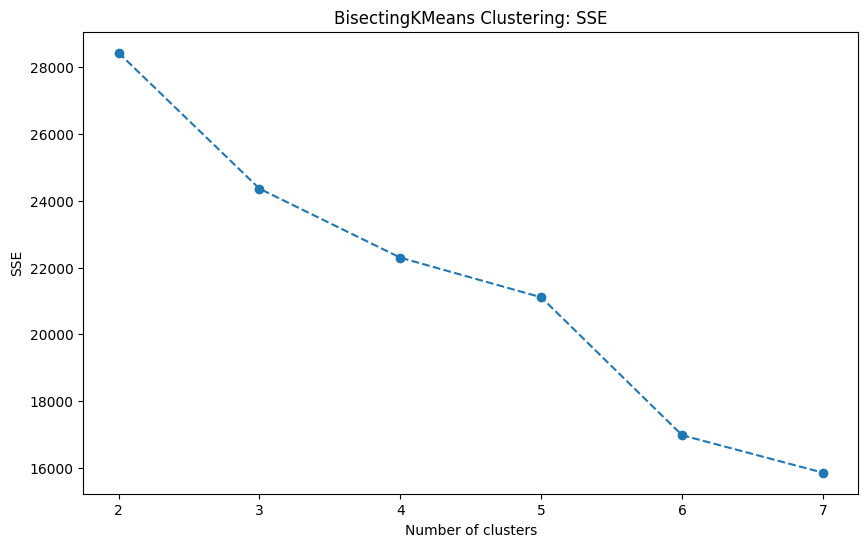

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 8), bisectingkmeans_sse, marker='o', linestyle='--')
plt.title('BisectingKMeans Clustering: SSE')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

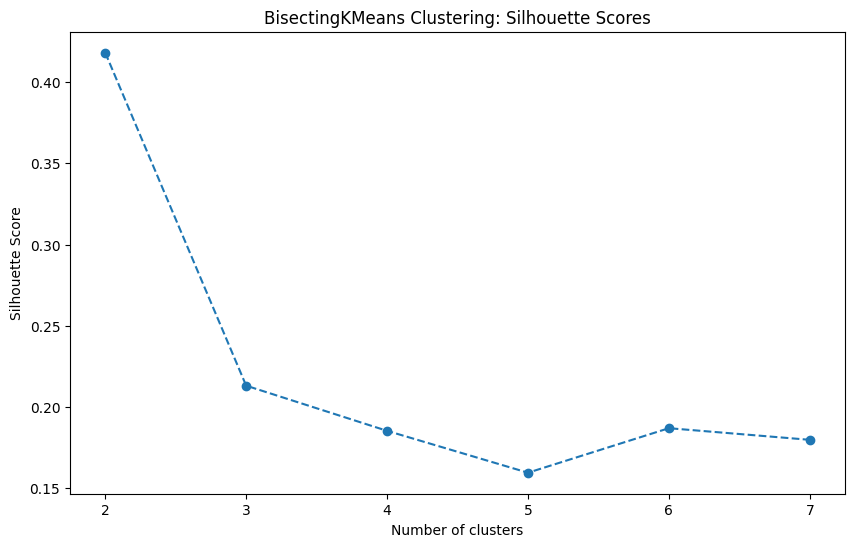

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 8), bisectingkmeans_silhouette_scores, marker='o', linestyle='--')
plt.title('BisectingKMeans Clustering: Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=2, n_init='auto')
y_kmeans = kmeans.fit_predict(X_top_5)

ari = adjusted_rand_score(y, y_kmeans)
nmi = normalized_mutual_info_score(y, y_kmeans)
silhouette = silhouette_score(X_top_5, y_kmeans)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.017623281588269646
Normalized Mutual Information: 0.011330090937800304


In [20]:
bisectingkmeans = BisectingKMeans(n_clusters=2)
y_bisectingkmeans = bisectingkmeans.fit_predict(X_top_5)

ari = adjusted_rand_score(y, y_bisectingkmeans)
nmi = normalized_mutual_info_score(y, y_bisectingkmeans)
silhouette = silhouette_score(X_top_5, y_bisectingkmeans)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.017671976200457913
Normalized Mutual Information: 0.011367572951140239


In [22]:
dump([kmeans,bisectingkmeans],'kmeans.joblib')

['kmeans.joblib']